In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plots
%matplotlib inline

In [3]:
monet = pd.read_csv('monet.csv')
monet

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
0,3.993780,21.3,25.6,1,1,1
1,8.800000,31.9,25.6,1,2,2
2,0.131694,6.9,15.9,0,3,3
3,2.037500,25.7,32.0,1,4,2
4,1.487500,25.7,32.0,1,4,2
...,...,...,...,...,...,...
425,5.282500,25.6,39.4,1,375,1
426,9.352500,25.9,39.6,1,375,2
427,8.252500,25.6,39.6,1,375,1
428,3.410000,25.6,39.4,1,386,2


In [4]:
monet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRICE    430 non-null    float64
 1   HEIGHT   430 non-null    float64
 2   WIDTH    430 non-null    float64
 3   SIGNED   430 non-null    int64  
 4   PICTURE  430 non-null    int64  
 5   HOUSE    430 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 20.3 KB


In [6]:
monet.shape

(430, 6)

In [5]:
monet.describe()

,PRICE,HEIGHT,WIDTH,SIGNED,PICTURE,HOUSE
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.089996,27.646977,32.111395,0.820930,182.644186,1.611628
std,4.311260,10.097013,10.459677,0.383857,109.091529,0.591592
min,0.010413,3.900000,6.700000,0.000000,1.000000,1.000000
25%,0.600153,23.125000,28.525000,1.000000,87.250000,1.000000
50%,1.312782,25.600000,31.900000,1.000000,179.500000,2.000000
75%,3.850000,31.450000,36.200000,1.000000,274.750000,2.000000
max,33.013504,78.700000,89.000000,1.000000,387.000000,3.000000


In [7]:
monet.columns

Index(['PRICE', 'HEIGHT', 'WIDTH', 'SIGNED', 'PICTURE', 'HOUSE '], dtype='object')

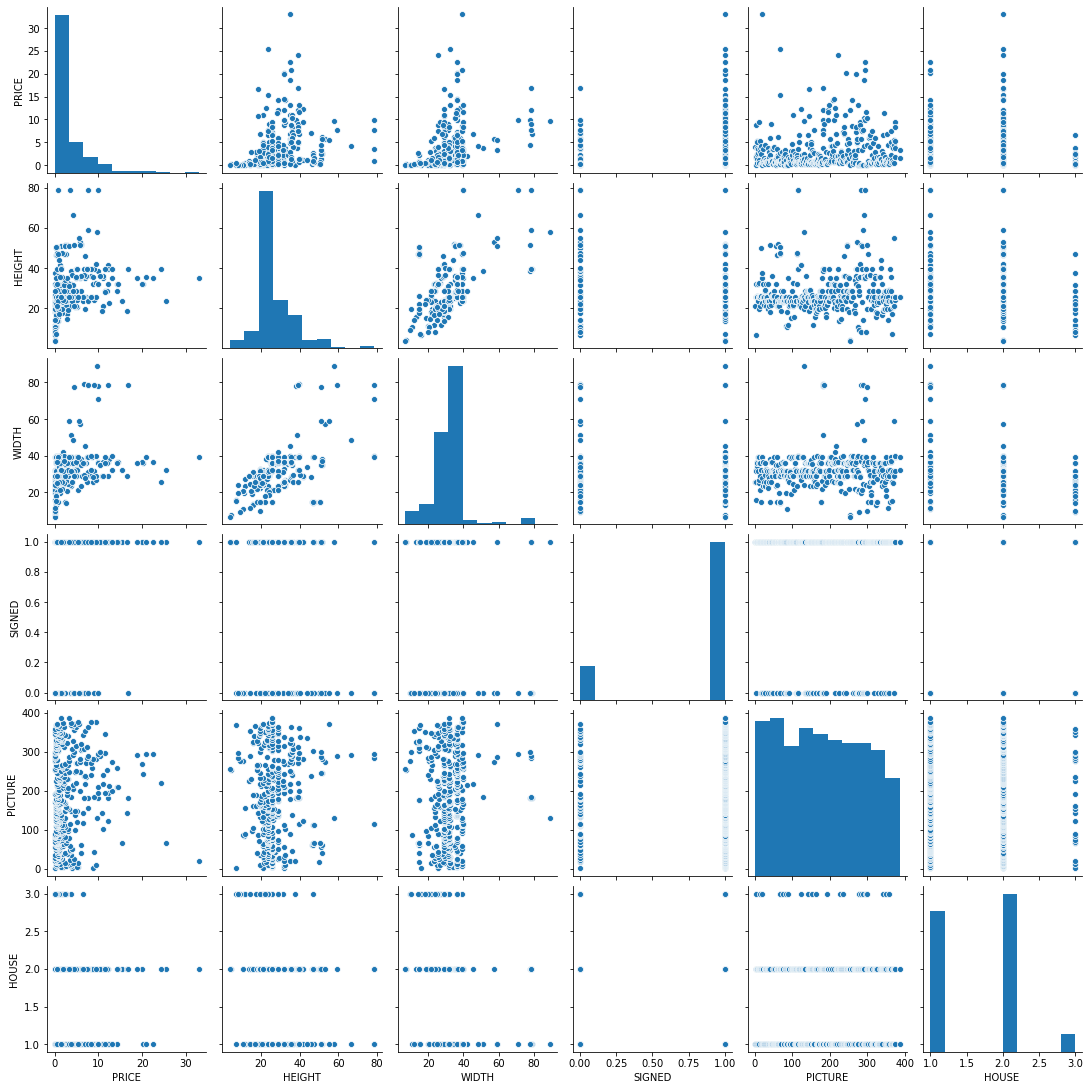

In [9]:
sns.pairplot(monet)

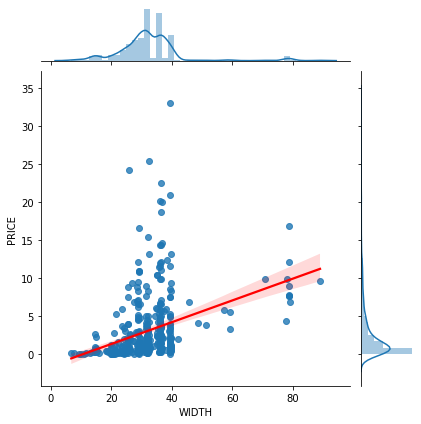

In [19]:
sns.jointplot(x = monet['WIDTH'], y = monet['PRICE'], kind = 'reg', joint_kws={'line_kws':{'color':'red'}})



In [21]:
#spliting the data into training and test sets. So, We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [68]:
X = monet [['WIDTH']]
y = monet['PRICE']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [70]:
# Training the algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [71]:
help(lr.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

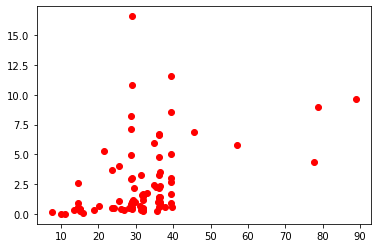

In [75]:
plots.scatter(X_test, y_test, color = 'red')
plots.plot(X_train, regressor.predict(X_train), color = 'blue')
plots.xlabel('WIDTH')
plots.ylabel('PRICE')
plots.show()

In [73]:
lr.coef_

array([0.15992738])

In [74]:
lr.intercept_

-1.9319558105933483

In [79]:
predictedp = lr.predict(X_test)


In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictedp})
df

,Actual,Predicted
205,2.202500,3.857415
12,2.723870,4.369183
175,0.790229,3.905394
364,4.821298,3.857415
81,2.618350,0.370998
...,...,...
272,3.025000,4.385176
210,0.271800,0.466955
141,0.632500,2.721931
407,0.679500,3.905394


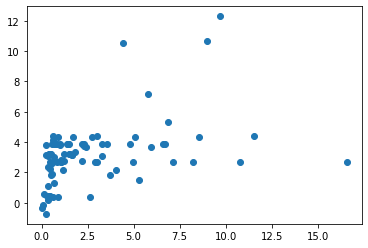

In [80]:
plots.scatter(y_test,predictedp)

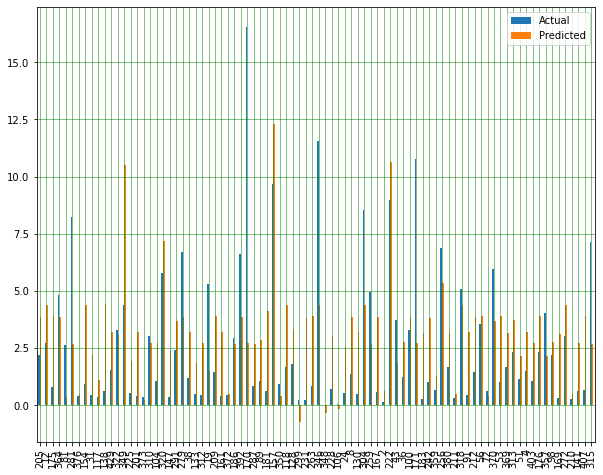

In [83]:
df.plot(kind='bar',figsize=(10,8))
plots.grid(which='major', linewidth='0.5', color='green')
plots.grid(which='minor',  linewidth='0.5', color='black')
plots.show()

In [84]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictedp))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictedp))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictedp)))

Mean Absolute Error: 2.1880419989785924
Mean Squared Error: 8.612935791747875
Root Mean Squared Error: 2.934780365163273


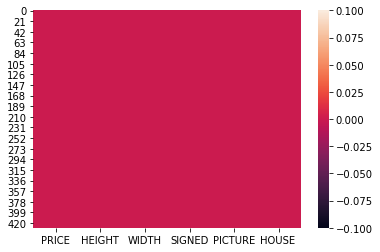

In [86]:
sns.heatmap(monet.isnull())

In [88]:
X = monet [['HEIGHT', 'WIDTH', 'SIGNED', 'PICTURE', 'HOUSE ']]
y = monet [['PRICE']]

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [93]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, predictedp))

2.934780365163273

In [94]:
metrics.mean_squared_error(y_test, predictedp)

8.612935791747875

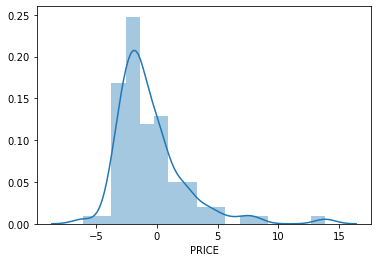

In [96]:
sns.distplot(y_test-predictedp)